# bra数据集分析

## 导入必要的包

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']
my_font = font_manager.FontProperties(fname="C:/WINDOWS/Fonts/FZWBJW.TTF")              # 字体设置

bra_dataset = pd.read_csv("D:/deep-learning/datasets/bra.csv")          # 读入bra.csv数据
# color_dataset = pd.read_csv("D:/deep-learning/datasets/colors.csv", encoding = 'GB2312')     # 读入colors.csv数据
color_dataset = pd.read_csv(r"D:/deep-learning/datasets/colors.csv", names = ['productColor', 'colors'], header = 0) 
bra_dataset,color_dataset

(              creationTime productColor productSize
 0      2016-06-08 17:17:00        22咖啡色         75C
 1      2017-04-07 19:34:25        22咖啡色         80B
 2      2016-06-18 19:44:56         02粉色         80C
 3      2017-08-03 20:39:18        22咖啡色         80B
 4      2016-07-06 14:02:08        22咖啡色         75B
 ...                    ...          ...         ...
 15492  2017-10-28 22:39:44           粉色     38B/85B
 15493  2017-11-11 00:13:32    粉色套装（含内裤）     36C/80C
 15494  2017-11-01 14:41:08           黑色     34A/75A
 15495  2017-10-31 18:40:09           粉色     34B/75B
 15496  2017-11-07 18:38:14           黑色     36A/80A
 
 [15497 rows x 3 columns],
      productColor colors
 0           22咖啡色     棕色
 1            02粉色     粉色
 2           071蓝色     蓝色
 3           071黑色     黑色
 4           071肤色     肤色
 ..            ...    ...
 113         蓝色 单件     蓝色
 114            浅紫     紫色
 115  紫色套装（其他颜色备注）     紫色
 116     粉色套装（含内裤）     粉色
 117            虾粉     粉色
 
 [118 rows x 2 column

## 合并两个数据集

In [2]:
bra = pd.merge(bra_dataset, color_dataset, on = 'productColor', how = 'left')
bra.dropna(how = 'any', subset = ['colors','productSize'], inplace = True)
bra.index = range(len(bra))
size = pd.unique(bra['productSize'])
color = pd.unique(bra['colors'])
size, color

(array(['75C', '80B', '80C', '75B', '70C', '85B', '70B', '85C', '75C/34C',
        '80B/36B', '85C/38C', '85A/38A', '85B/38B', '80A/36A', '70A/32A',
        '80C/36C', '75B/34B', '75A/34A', '70B/32B', '70C/32C', 'B80',
        'B75', 'C80', '170/82/XL', 'C75', '160/70/M', 'B70', '165/76/L',
        'C70', '90C/40C', '90B/40B', '85D/38D', '85B+(内裤)套装', '85E/38E',
        '80D/36D', '90D/40D', '80E/36E', '75E/34E', '90E/40E', '75D/34D',
        '95C', '95E', '85E+(内裤)套装', '95D', '75B+(内裤)套装', '75B=34B',
        '80B=36B', '80C=36C', '90D=40D', '85B=38B', '80A=36A', '85C=38C',
        '90B=40B', '75A=34A', '90C=40C', '85A=38A', '75C=34C', '85/38C',
        '75B/34', '85B/38', '80B/36', '70B/32', 'A75', 'A80', 'A70', '75A',
        '80A', '70A', '85A', '70A=32A', '70B=32B', 'A85', 'C85', 'B85',
        '90C', '40/90A=XL码', '34/75D=L码', '32/70B=S码', '36/80B=L码',
        '38/85A=L码', '38/85C=XL码', '36/80C=L码', '38/85B=XL码', '38/85D=XL码',
        '34/75B=M码', '34/75C=M码', '34/75A=S码', '40/90C

## 数据清洗-正则表达式

In [3]:
'''设置正则表达式pattren'''
pattern_A = re.compile(r'1\d\d\/\d\d\/[A-Z][A-Z]?|[7-9][\d][\w][\w]',re.I)
pattern_B = re.compile(r'[7-9]\d[A-Z]', re.I)
pattern_C = re.compile(r'[A-Z][7-9]\d', re.I)
pattern_D = re.compile(r'([7-9]\d)\/\d\d(\w)')
for i in range(len(bra)):
    try:
        size_matchA = pattern_A.findall(bra['productSize'][i])
        size_matchB = pattern_B.findall(bra['productSize'][i])
        size_matchC = pattern_C.findall(bra['productSize'][i])
        size_matchD = pattern_D.findall(bra['productSize'][i])

        if size_matchA:
            # print(size_matchA)
            bra.drop(i, axis = 0, inplace = True)
        elif size_matchB:
            # print(size_matchB)
            bra['productSize'][i] = size_matchB[0].upper()
        elif size_matchC:
            # print(size_matchC)
            bra['productSize'][i] = size_matchC[0][1:] + size_matchC[0][0].upper()
        elif size_matchD:
            # print(size_matchD)
            bra['productSize'][i] = size_matchD[0][0] + size_matchD[0][1].upper()
    except:
        continue
bra.index = range(len(bra))
bra

,creationTime,productColor,productSize,colors
0,2016-06-08 17:17:00,22咖啡色,75C,棕色
1,2017-04-07 19:34:25,22咖啡色,80B,棕色
2,2016-06-18 19:44:56,02粉色,80C,粉色
3,2017-08-03 20:39:18,22咖啡色,80B,棕色
4,2016-07-06 14:02:08,22咖啡色,75B,棕色
...,...,...,...,...
15085,2017-10-28 22:39:44,粉色,85B,粉色
15086,2017-11-11 00:13:32,粉色套装（含内裤）,80C,粉色
15087,2017-11-01 14:41:08,黑色,75A,黑色
15088,2017-10-31 18:40:09,粉色,75B,粉色


## 频数统计 

In [4]:
size = bra['productSize'].value_counts(ascending = False)
color = bra['colors'].value_counts(ascending = False)
combine = pd.Series(bra['productSize'] + bra['colors']).value_counts(ascending = False)
# size, color, combine

In [5]:
def cor(series):
        color_code_list=['b', 'r', 'purple', 'navajowhite', 'k',
                  'pink', 'yellow', 'grey', 'limegreen', 'peru']
        color_list=["蓝色", "红色", "紫色", "肤色", "黑色", 
                   "粉色", "黄色", "灰色", "绿色", "棕色"]
        cor = []
        for i in range(len(series)):
            for j in range(len(color_list)):
                if color_list[j] in series[i]:    
                    cor.append(color_code_list[j])
        return cor

## 绘图 

### 尺码频数统计图 

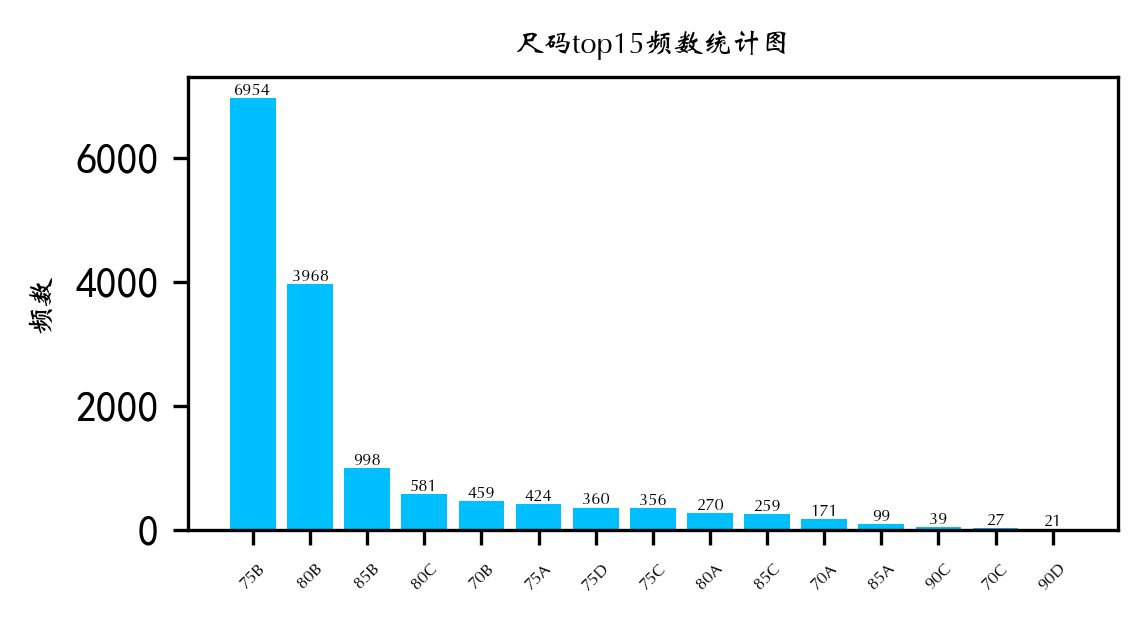

In [6]:
plt.figure(figsize = (4, 2), dpi = 300)
plt.title('尺码top15频数统计图', fontproperties = my_font, fontsize = 7)
plt.bar(size.keys()[:15], size.values[:15], color = 'deepskyblue')
plt.ylabel('频数', fontproperties = my_font, fontsize = 7)
plt.xticks(size.keys()[:15], rotation = 45, fontproperties = my_font, fontsize = 4)
for a, b in zip(size.keys()[:15], size.values[:15]):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontproperties = my_font, fontsize = 4)
plt.show()

### 颜色频数统计图 

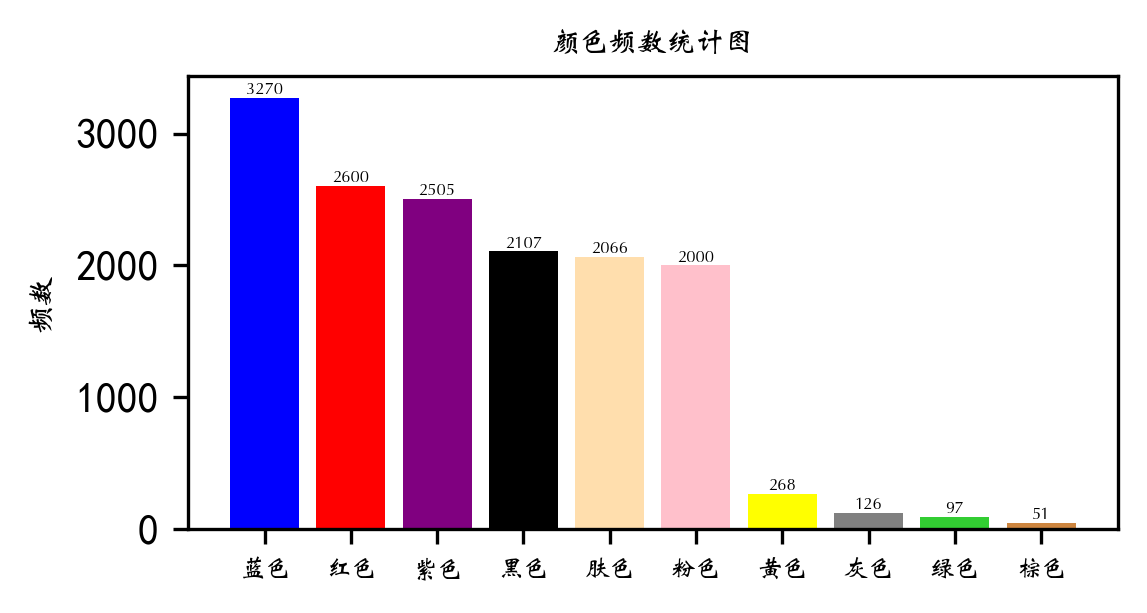

In [7]:
plt.figure(figsize = (4, 2), dpi = 300)
plt.title('颜色频数统计图', fontproperties = my_font, fontsize = 7)
plt.bar(color.keys(), color.values, color = cor(color.keys()))
plt.ylabel('频数',fontproperties = my_font, fontsize = 7)
plt.xticks(color.keys(), rotation = 0, fontproperties = my_font, fontsize = 6)
for a, b in zip(color.keys(), color.values):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontproperties = my_font, fontsize = 4)
plt.show()

### 颜色与尺码组合top20统计图 

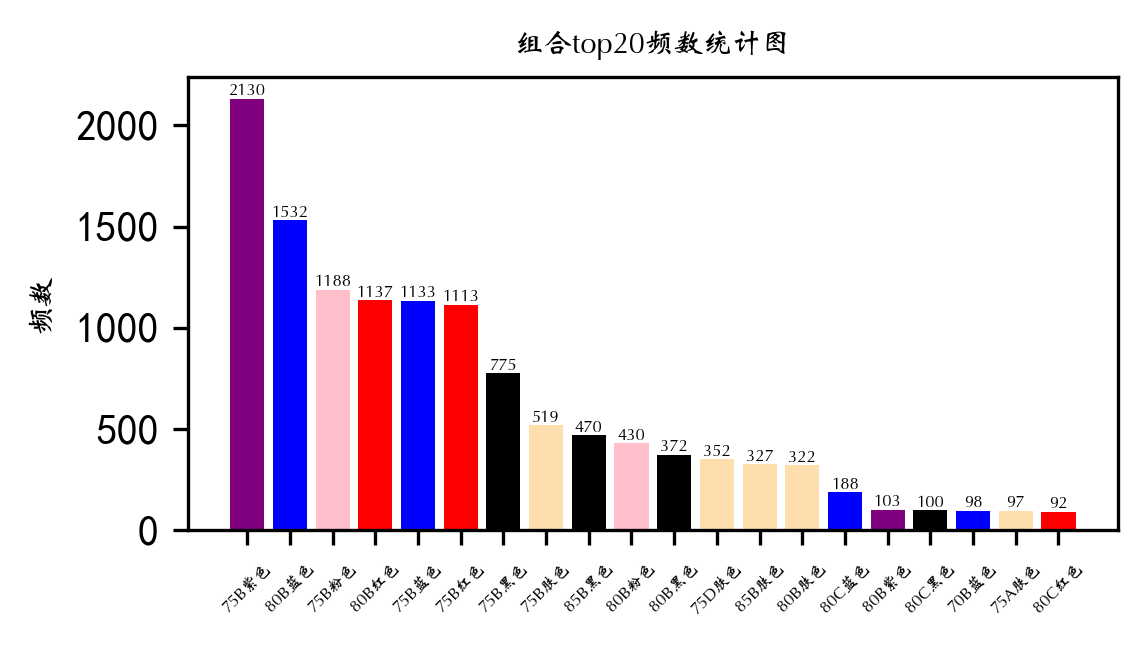

In [8]:
plt.figure(figsize = (4, 2), dpi = 300)
plt.title('组合top20频数统计图', fontproperties = my_font, fontsize = 7)
plt.bar(combine.keys()[:20], combine.values[:20], color = cor(combine.keys()[:20]))
plt.ylabel('频数',fontproperties = my_font, fontsize = 7)
plt.xticks(combine.keys()[:20], rotation = 45, fontproperties = my_font, fontsize = 4)
for a, b in zip(combine.keys()[:20], combine.values):
    plt.text(a, b, '%.0f'%b, ha = 'center', va = 'bottom', fontproperties = my_font, fontsize = 4)
plt.show()